# Sacred Experiment Comparison

The goal of this notebook is to provide a mechanism to compare sacred experiments: the cfg, the metrics, and the outcome.

In [190]:
# project imports
import env
from utils import read_json_data, flatten_dict
from models import MODEL_DIR


# python & package imports
from collections import defaultdict
import pandas as pd
import json
import os


# plot things
%matplotlib inline
# autoreload modules
%load_ext autoreload
%autoreload 2


model_dir = os.path.join(MODEL_DIR, 'voxel_vaegan1', 'modelnet10')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model Leaderboard

In [130]:
scores = dict()
for m in os.listdir(model_dir):
    name = m
    metrics_json = os.path.join(model_dir, m, 'metrics.json')
    #print(metrics_json)
    #if os.path.exists(metrics_json):
    #    df = pd.read_json(metrics_json, orient='values')
    #    break
    metrics_dict = read_json_data(metrics_json)
    if metrics_dict:
        # assuming only keys are epoch\d+
        keys = [int(key.replace('epoch', '')) for key in metrics_dict.keys()]
        last_epoch = sorted(keys)[-1]
        last_key = 'epoch{}'.format(last_epoch)
        scores[name] = metrics_dict[last_key]
        scores[name]['epoch'] = last_epoch

df = pd.DataFrame.from_dict(scores, orient='index')

In [131]:
df.sort_values('enc_loss')

,dis_loss,reconstruction_loss,kl_divergence,epoch,dec_loss,enc_loss,elapsed_time,ll_loss
2019-03-18_13-12-53,5.071535,0.251734,0.002028,79,11.358944,11.493311,908.568065,11290.522461
2019-03-17_08-40-29,4.714500,0.056535,0.022444,21,45.475174,15.197393,273.749028,12952.972656
2019-03-17_15-32-59,5.186166,0.109524,0.079465,79,85.769615,24.990257,906.537507,17043.722656
2019-03-15_10-33-37,-999.000000,352.732208,504.191772,9,-999.000000,123.401489,75.421927,NaN
2019-03-16_02-31-22,-999.000000,318.271698,1194.334961,14,-999.000000,134.447601,164.438432,NaN
2019-03-17_08-04-01,8.677526,0.113893,1.250060,1,80.383270,136.065567,23.935907,11059.523438
2019-03-15_17-08-43,-999.000000,346.030945,1152.592529,14,-999.000000,141.617874,166.663848,NaN
2019-03-14_17-18-00,-999.000000,1631.519775,4334.231445,9,-999.000000,158.275955,36.349445,NaN
2019-03-15_12-26-16,-999.000000,484.000122,631.050049,9,-999.000000,167.426086,122.187959,NaN
best,-999.000000,808.499634,488.078369,9,-999.000000,261.985138,43.024081,NaN


## Config Comparison

In [127]:
# provide the full path to root dir of the experiment output (the parent dir of the ckpts)
exp1 = os.path.join(model_dir, '2019-03-17_08-40-29')
exp2 = os.path.join(model_dir, '2019-03-18_07-57-03')

In [128]:
cfg1 = read_json_data(os.path.join(exp1, 'cfg.json'), verbose=True)
cfg2 = read_json_data(os.path.join(exp2, 'cfg.json'), verbose=True)
assert isinstance(cfg1, dict)
assert isinstance(cfg2, dict)

# flatten dict structure then bring into pandas for a pretty view
cfg1 = flatten_dict(cfg1)
cfg2 = flatten_dict(cfg2)
df1 = pd.DataFrame.from_dict(cfg1, orient='index', columns=['cfg1'])
df2 = pd.DataFrame.from_dict(cfg2, orient='index', columns=['cfg2'])
dff = pd.concat([df1, df2], axis=1, sort=False)
dff['diff'] = dff.cfg1 == dff.cfg2
dff

,cfg1,cfg2,diff
generator/verbose,True,True,True
model/dis_lr,0.0001,0.0001,True
model/tb_dir,tb,tb,True
dataset/index,/home/jcworkma/jack/3d-form/src/../data/proces...,/home/jcworkma/jack/3d-form/src/../data/proces...,True
model/no_gan,False,False,True
model/debug,True,False,False
model/ckpt_dir,/home/jcworkma/jack/3d-form/src/../models/voxe...,/home/jcworkma/jack/3d-form/src/../models/voxe...,False
model/recon_loss_weight,10000,10000,True
model/save_step,2,10,False
model/dev_step,2,10,False


## Reconstruction Test
Here we can reload a model and experiment with reconstructions.

In [191]:
# project imports
from models.voxel_vaegan import VoxelVaegan
from data.modelnet10 import ModelNet10
from data.thingi10k import Thingi10k
from data.voxels import plot_voxels
from utils import read_json_data


# python & package projects
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

# 500 epochs, just bird
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_09-30-02/model_epoch-499.ckpt'
# 500 epochs, just bird, increased recon weight
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_09-38-41/model_epoch-499.ckpt'
# 500 epochs, just bird, dropout 0.8
# early stop
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_09-44-48/model_epoch-199.ckpt'
# later stop
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_09-44-48/model_epoch-499.ckpt'
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_10-22-19/model_epoch-49.ckpt'

# first run with modelnet10
# {'reconstruction_loss': 808.4996337890625, 'dis_loss': -999.0, 'kl_divergence': 488.078369140625, 'dec_loss': -999.0, 'elapsed_time': 43.02408063411713, 'enc_loss': 261.9851379394531}
best_toilet = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_16-36-25/model_epoch-9.ckpt'
best_sofa = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-15_10-33-37/model_epoch-9.ckpt'
toilet_and_sofa = '/home/jcworkma/jack/3d-form/models/voxel_vaegan1/modelnet10/2019-03-15_12-26-16/model_epoch-9.ckpt'
vaegan_sofa13 = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-16_13-37-24/model_epoch-13.ckpt'
vaegan_sofa = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-16_13-37-24/model_epoch-5.ckpt'
vaegan_decent_toilets_21 = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-17_08-40-29'
vaegan_long_toilets = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-18_13-12-53'
vaegan_new_losses = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-19_19-31-20'
vaegan_1024_filter_discr = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-20_09-39-05/'

# model to use for reconstruction
model_root = vaegan_1024_filter_discr
model_cfg = read_json_data(os.path.join(model_root, 'cfg.json'))
model_ckpt = os.path.join(model_root, 'model_epoch-39.ckpt')

# restore the model from ckpt
vaegan = VoxelVaegan.initFromCfg(model_cfg)
vaegan.restore(model_ckpt)

INFO:tensorflow:Restoring parameters from /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-20_09-39-05/model_epoch-39.ckpt


INFO:tensorflow:Restoring parameters from /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-20_09-39-05/model_epoch-39.ckpt


### From Dataset Example

toilet_0172_32_x1_z3.binvox


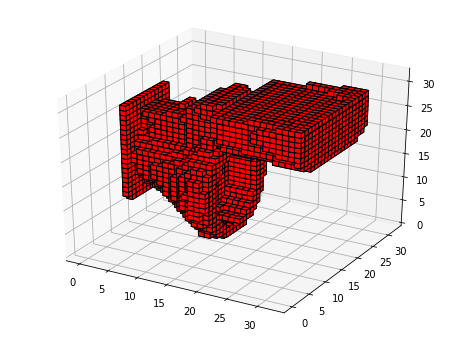

In [193]:
dataset_class = model_cfg.get('dataset').get('class')
dataset_index = model_cfg.get('dataset').get('index')
if dataset_class == 'Thingi10k':
    # get an stl example
    thingi = Thingi10k.init10k()
    stl_example = thingi.get_stl_path(stl_id=126660)
    training_example = thingi.get_voxels(32, stl_file=stl_example)
elif dataset_class == 'ModelNet10':
    modelnet = ModelNet10.initFromIndex(dataset_index)
    voxelsname, training_example = modelnet.get_random_voxels(32)
    print(voxelsname)
    
plot_voxels(training_example)
training_example = np.reshape(training_example, (-1, 32, 32, 32, 1))

In [194]:
recon = vaegan.reconstruct(training_example)
recon = np.reshape(recon, [32, 32, 32])
print('max: ', np.max(recon))
print('min: ', np.min(recon))
print('mean: ', np.mean(recon))

max:  0.9869205
min:  0.00028643484
mean:  0.23148736


<module 'matplotlib.pyplot' from '/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/matplotlib/pyplot.py'>

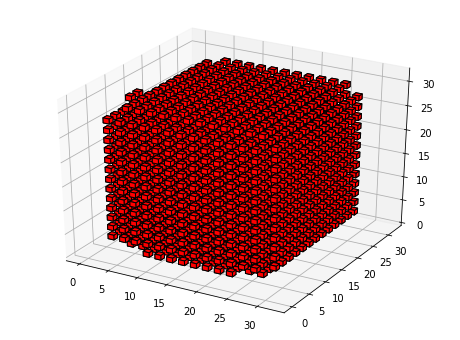

In [196]:
recon_threshold = recon > .72
plot_voxels(recon_threshold)

### From Latent Vector

In [162]:
latent_vector = vaegan.random_latent_vector()
recon = vaegan.latent_recon(latent_vector)
plot_voxels(recon)

FailedPreconditionError: Attempting to use uninitialized value encoder/dense/kernel
	 [[node encoder/dense/kernel/read (defined at /home/jcworkma/jack/3d-form/src/models/voxel_vaegan.py:197)  = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](encoder/dense/kernel)]]

Caused by op 'encoder/dense/kernel/read', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-151-2ec685874faf>", line 42, in <module>
    vaegan = VoxelVaegan.initFromCfg(model_cfg)
  File "/home/jcworkma/jack/3d-form/src/models/voxel_vaegan.py", line 128, in initFromCfg
    no_gan=cfg_model.get('no_gan'))
  File "/home/jcworkma/jack/3d-form/src/models/voxel_vaegan.py", line 76, in __init__
    self.encoder, self.enc_mu, self.enc_sig = self._make_encoder(self._input_x, self._keep_prob, self._trainable)
  File "/home/jcworkma/jack/3d-form/src/models/voxel_vaegan.py", line 197, in _make_encoder
    kernel_initializer=tf.initializers.glorot_uniform()))
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/layers/core.py", line 184, in dense
    return layer.apply(inputs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/keras/engine/base_layer.py", line 817, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/layers/base.py", line 374, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/keras/engine/base_layer.py", line 746, in __call__
    self.build(input_shapes)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/keras/layers/core.py", line 944, in build
    trainable=True)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/layers/base.py", line 288, in add_weight
    getter=vs.get_variable)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/keras/engine/base_layer.py", line 609, in add_weight
    aggregation=aggregation)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/training/checkpointable/base.py", line 639, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 1487, in get_variable
    aggregation=aggregation)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 1237, in get_variable
    aggregation=aggregation)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 540, in get_variable
    aggregation=aggregation)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 492, in _true_getter
    aggregation=aggregation)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 922, in _get_single_variable
    aggregation=aggregation)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 183, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 146, in _variable_v1_call
    aggregation=aggregation)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 125, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 2444, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 187, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 1329, in __init__
    constraint=constraint)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 1491, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    return gen_array_ops.identity(input, name=name)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3454, in identity
    "Identity", input=input, name=name)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value encoder/dense/kernel
	 [[node encoder/dense/kernel/read (defined at /home/jcworkma/jack/3d-form/src/models/voxel_vaegan.py:197)  = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](encoder/dense/kernel)]]
